In [33]:
import gensim

# Path to dataset
word2vec_path = "GoogleNews-vectors-negative300.bin"

# Load 200,000 most common words
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=200000)

def make_list_of_word(word):
    return [word,] if isinstance(word, str) else word

def most_similar_100(positive_words: list, negative_words = None):
    if negative_words is None:
        return word2vec_model.most_similar(positive=make_list_of_word(positive_words), topn=100)
    else:
        return word2vec_model.most_similar(positive=make_list_of_word(positive_words),
                                           negative=make_list_of_word(negative_words), topn=100)




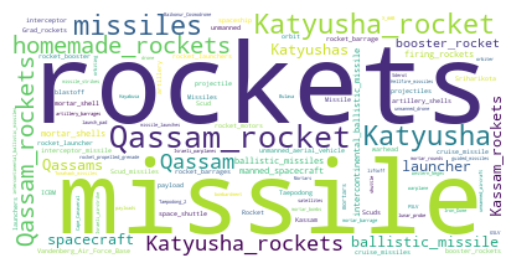

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from wordcloud import WordCloud


def list_to_frequency_dict(frequency_list):
    return {element: probability for element, probability in frequency_list}


def create_wordcloud(frequencies_dict):
    word_cloud = WordCloud(background_color = 'white').generate_from_frequencies(frequencies_dict)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    
    plt.savefig('wordcloud.png', bbox_inches='tight')


frequencies = most_similar(positive_words=["rocket"])
frequencies_dict = list_to_frequency_dict(frequencies)

create_wordcloud(frequencies_dict)




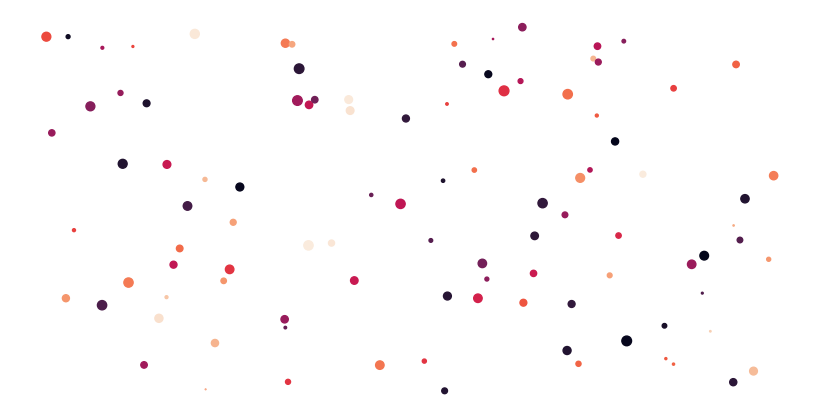

In [65]:
import customtkinter as ctk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# generate root
root = ctk.CTk()
root.geometry("800x400")

# generate random numbers for the plot
x,y,s,c = np.random.rand(4,100)

# generate the figure and plot object which will be linked to the root element
fig, ax = plt.subplots()
fig.set_size_inches(8,4)
ax.scatter(x,y,s*50,c)
ax.axis("off")
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0)
canvas = FigureCanvasTkAgg(fig,master=root)
canvas.draw()
canvas.get_tk_widget().place(relx=0.15, rely=0.15)

# initiate the window
root.mainloop()